In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [5]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [7]:
Y = df['species']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [13]:
model.fit(Xtrain,Ytrain)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=101)

In [14]:
preds = model.predict(Xtest)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [16]:
accuracy_score(Ytest,preds)

0.9702970297029703

In [17]:
print(classification_report(Ytest,preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [18]:
confusion_matrix(Ytest,preds)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


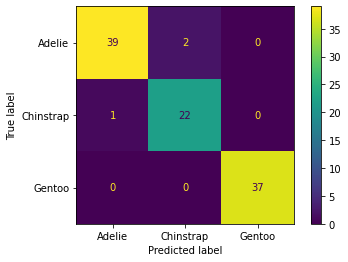

In [19]:
plot_confusion_matrix(model,Xtest,Ytest)

In [20]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [21]:
pd.DataFrame(index=X.columns,data=model.feature_importances_)

,0
culmen_length_mm,0.318677
culmen_depth_mm,0.101849
flipper_length_mm,0.173434
body_mass_g,0.213170
island_Dream,0.145121
island_Torgersen,0.037201
sex_FEMALE,0.006323
sex_MALE,0.004226


In [22]:
errs = []

for i in range(1,40):
    
    model = RandomForestClassifier(n_estimators=i,max_features='auto')
    model.fit(Xtrain,Ytrain)
    preds = model.predict(Xtest)
    
    err = 1 - accuracy_score(Ytest,preds)
    errs.append(err)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

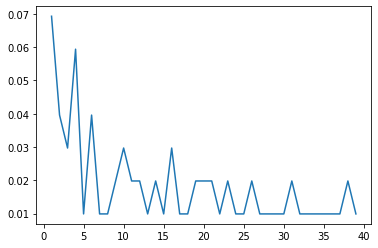

In [25]:
plt.plot(range(1,40),errs)

In [26]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [27]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [29]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

<AxesSubplot:>

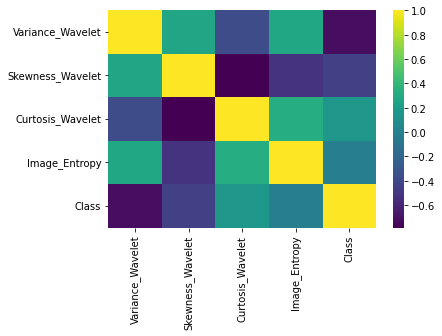

In [31]:
sns.heatmap(df.corr(),cmap='viridis')

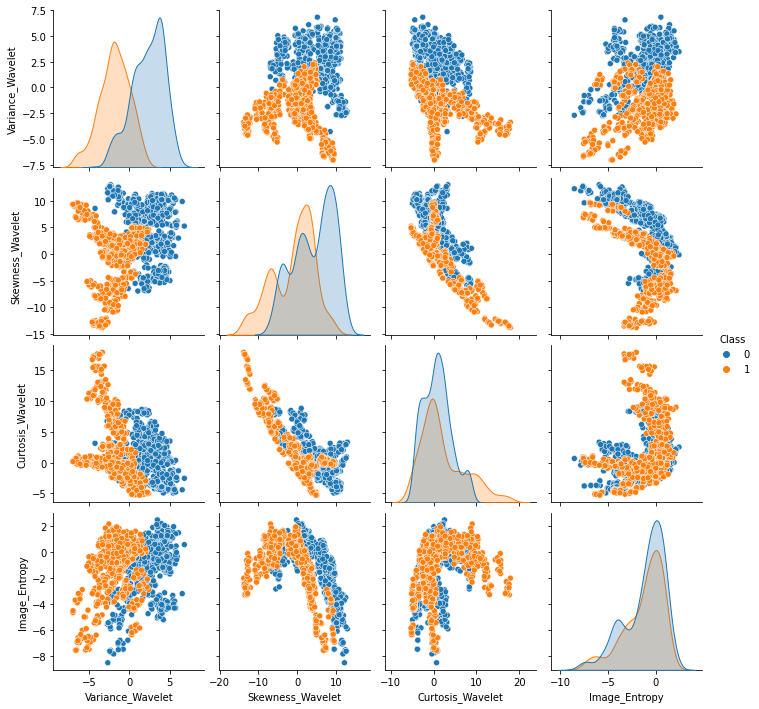

In [32]:
sns.pairplot(data=df,hue='Class')

In [33]:
X = df.drop('Class',axis=1)
Y = df['Class']

In [45]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.15,random_state=101)

In [36]:
from sklearn.model_selection import GridSearchCV

In [46]:
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob = [True,False]

In [47]:
params = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob}

In [48]:
model = RandomForestClassifier()

In [49]:
grid = GridSearchCV(model,params)

In [50]:
grid.fit(Xtrain,Ytrain)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag esti

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [51]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [52]:
preds = grid.predict(Xtest)

In [53]:
accuracy_score(Ytest,preds)

0.9902912621359223

In [54]:
confusion_matrix(Ytest,preds)

array([[122,   2],
       [  0,  82]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


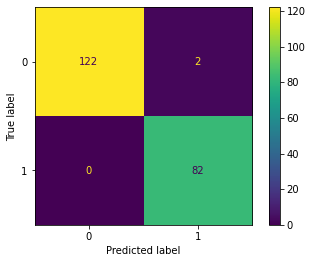

In [55]:
plot_confusion_matrix(grid,Xtest,Ytest)

In [56]:
print(classification_report(Ytest,preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [57]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [61]:
df.head()

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [60]:
df.columns = ['signal','density']

<AxesSubplot:xlabel='signal', ylabel='density'>

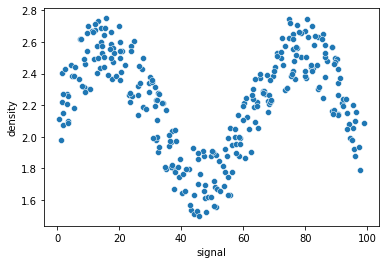

In [62]:
sns.scatterplot(data=df,x='signal',y='density')

In [111]:
X = df['signal'].values.reshape(-1,1)
Y = df['density']

In [64]:

X.head()

,signal
0,72.945124
1,14.229877
2,36.597334
3,9.578899
4,21.765897


In [112]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.1,random_state=101)

In [66]:
from sklearn.linear_model import LinearRegression

In [114]:
model = LinearRegression()

In [115]:
model.fit(Xtrain,Ytrain)

LinearRegression()

In [116]:
preds = model.predict(Xtest)

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [117]:
mean_absolute_error(Ytest,preds)

0.211198973318633

In [118]:
np.sqrt(mean_squared_error(Ytest,preds))

0.2570051996584629

In [119]:
np.mean(Ytest)

2.267044999300512

In [99]:
Ytest

176    2.179775
250    2.621238
12     2.231671
16     2.320837
258    1.908089
281    1.789537
226    2.263986
284    2.148269
147    2.496735
228    2.442191
235    1.897325
123    1.923440
221    2.266713
270    2.192791
78     2.415050
89     2.661302
4      2.452374
143    2.656490
19     2.343174
259    2.360571
200    2.261214
41     2.038879
208    2.543720
15     2.545491
153    2.300750
285    2.359919
169    1.999187
265    1.658609
13     2.431704
212    2.300320
Name: density, dtype: float64

In [120]:
signalRange  = np.arange(0,100)

In [121]:
output = model.predict(signalRange.reshape(-1,1))

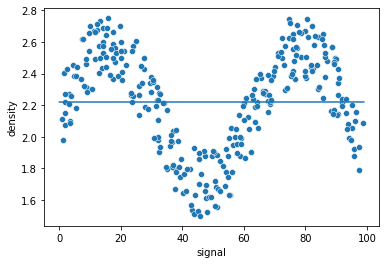

In [122]:
sns.scatterplot(data=df,x='signal',y='density')
plt.plot(output)

In [125]:
type(df['signal'].values.reshape(-1,1))

numpy.ndarray

In [126]:
type(df.drop('density',axis=1))

pandas.core.frame.DataFrame

In [146]:
def runModel(model,Xtrain,Xtest,Ytrain,Ytest):
    
    model.fit(Xtrain,Ytrain)
    preds = model.predict(Xtest)
    
    rmse = np.sqrt(mean_squared_error(Ytest,preds))
    mae = mean_absolute_error(Ytest,preds)
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    
    range1 = np.arange(0,100)
    output = model.predict(range1.reshape(-1,1))
    
    plt.figure(figsize=(10,6),dpi=150)
    sns.scatterplot(data=df,x='signal',y='density',color='red')
    plt.plot(range1,output)

mae: 0.211198973318633
rmse: 0.2570051996584629


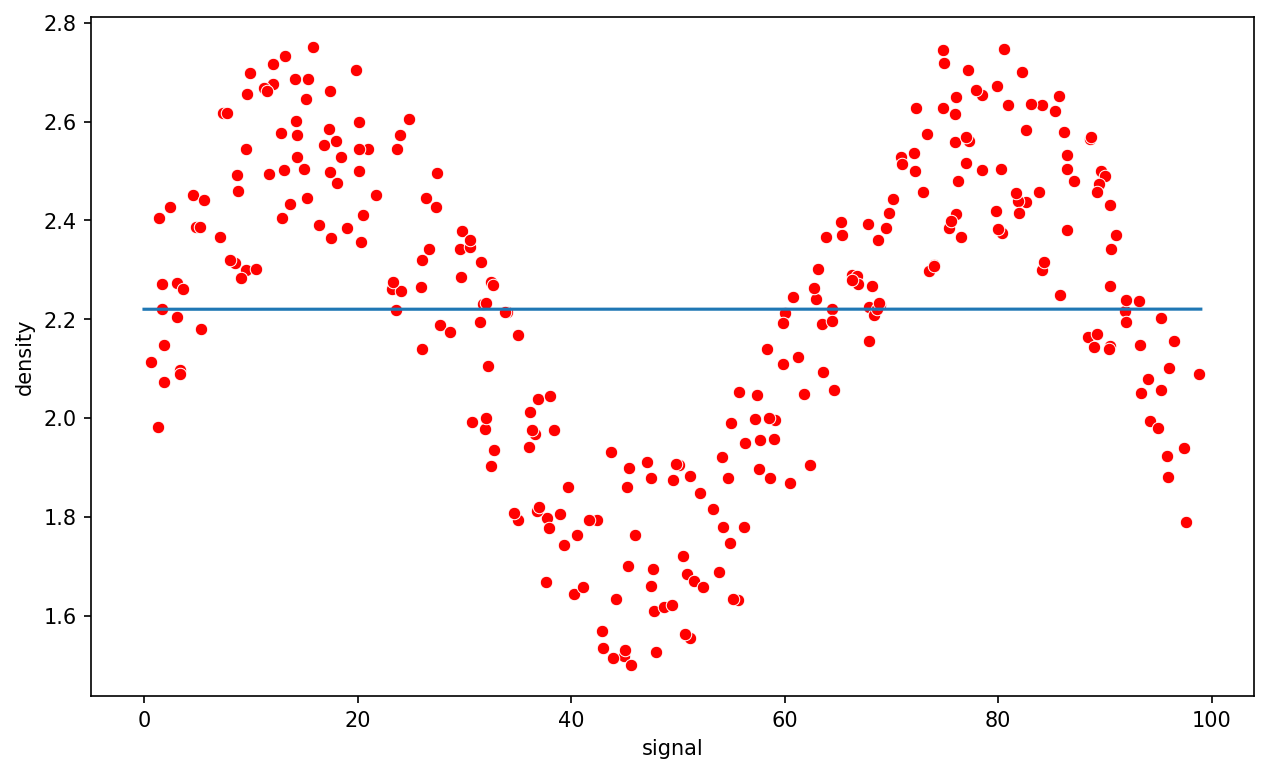

In [147]:
runModel(model,Xtrain,Xtest,Ytrain,Ytest)

In [135]:
from sklearn.preprocessing import PolynomialFeatures

In [136]:
from sklearn.pipeline import make_pipeline

In [137]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

mae: 0.22903105443511335
rmse: 0.2817309563725596


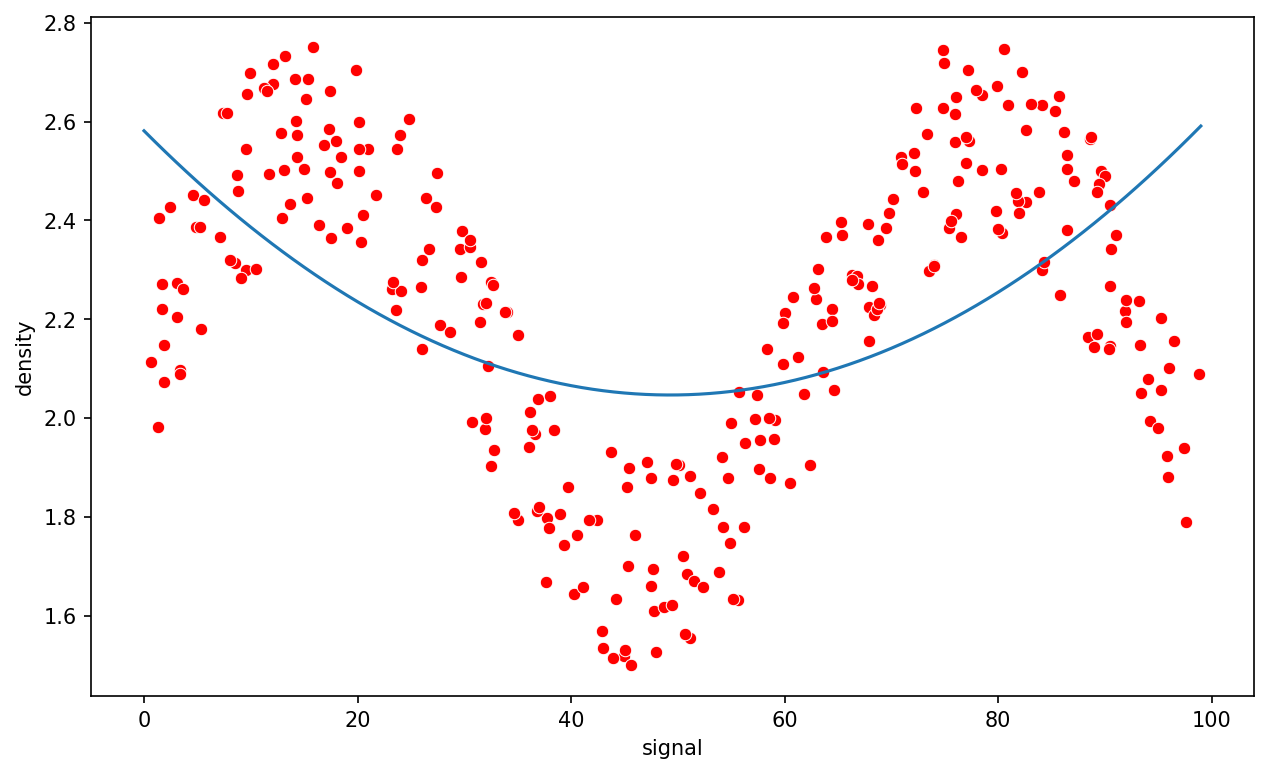

In [148]:
runModel(pipe,Xtrain,Xtest,Ytrain,Ytest)

mae: 0.1249966736005647
rmse: 0.1407876660205461


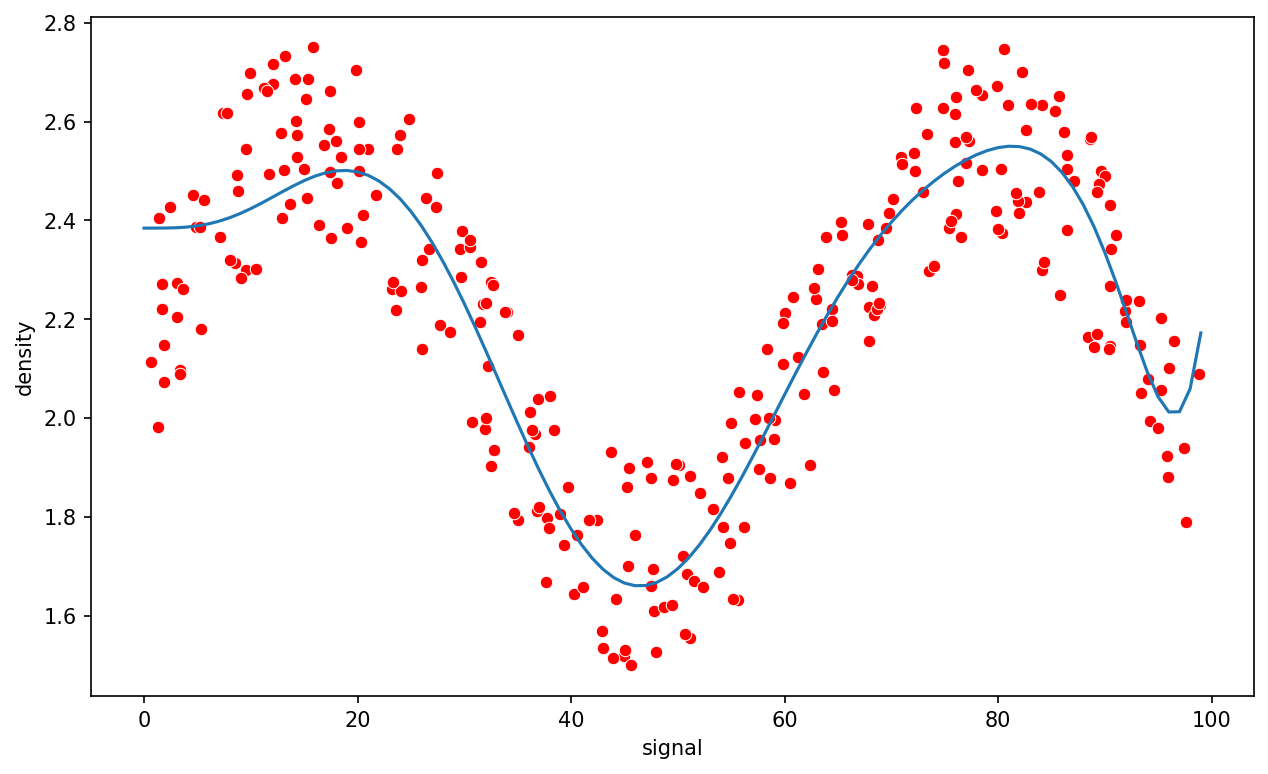

In [153]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
runModel(pipe,Xtrain,Xtest,Ytrain,Ytest)

In [154]:
from sklearn.neighbors import KNeighborsRegressor

mae: 0.11969122389484065
rmse: 0.1380744906136982


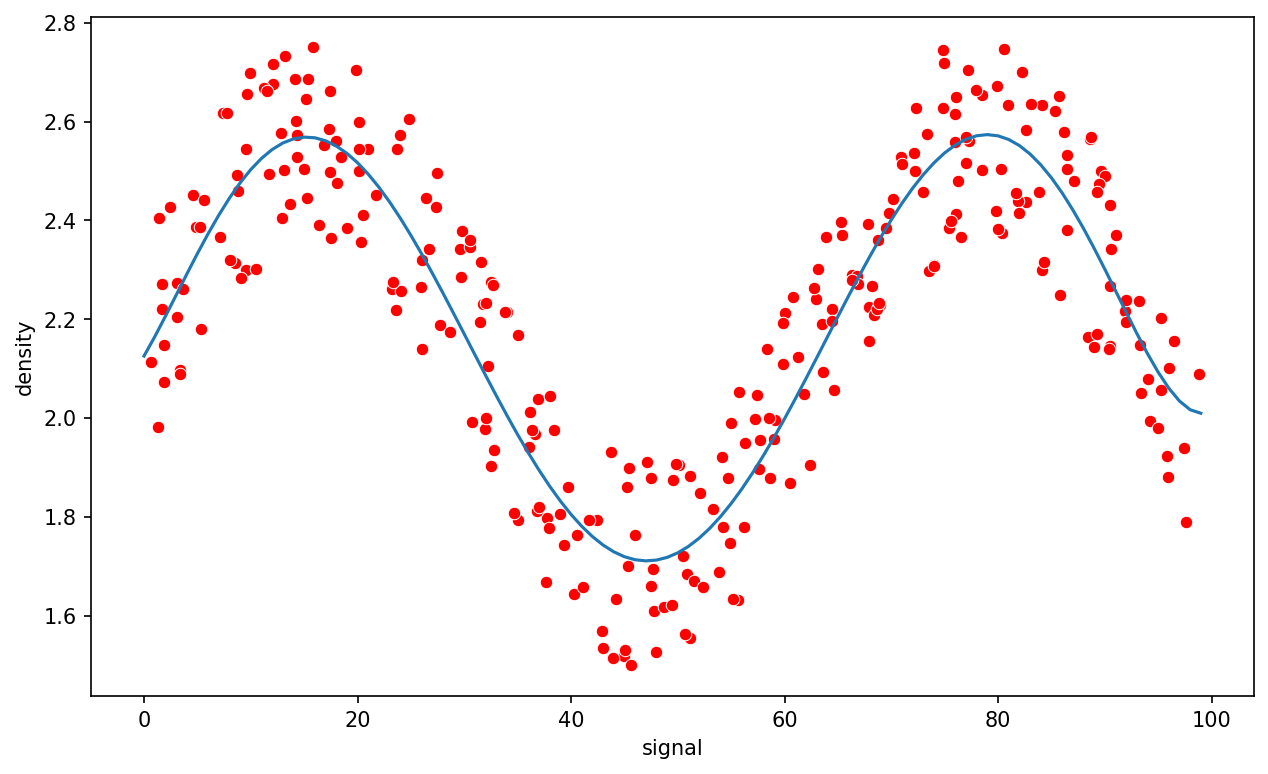

In [155]:
pipe = make_pipeline(PolynomialFeatures(6),LinearRegression())
runModel(pipe,Xtrain,Xtest,Ytrain,Ytest)